In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
url = "https://www.gutenberg.org/cache/epub/58221/pg58221-images.html"
contenido = requests.get(url).text

In [ ]:
print(contenido)

<!DOCTYPE html>
<html lang="es">
<head>
<meta charset="utf-8"><style>
#pg-header div, #pg-footer div {
    all: initial;
    display: block;
    margin-top: 1em;
    margin-bottom: 1em;
    margin-left: 2em;
}
#pg-footer div.agate {
    font-size: 90%;
    margin-top: 0;
    margin-bottom: 0;
    text-align: center;
}
#pg-footer li {
    all: initial;
    display: block;
    margin-top: 1em;
    margin-bottom: 1em;
    text-indent: -0.6em;
}
#pg-footer div.secthead {
    font-size: 110%;
    font-weight: bold;
}
#pg-footer #project-gutenberg-license {
    font-size: 110%;
    margin-top: 0;
    margin-bottom: 0;
    text-align: center;
}
#pg-header-heading {
    all: inherit;
    text-align: center;
    font-size: 120%;
    font-weight:bold;
}
#pg-footer-heading {
    all: inherit;
    text-align: center;
    font-size: 120%;
    font-weight: normal;
    margin-top: 0;
    margin-bottom: 0;
}
#pg-header #pg-machine-header p {
    text-indent: -4em;
    margin-left: 4em;
    margin-top:

In [ ]:
soup = BeautifulSoup(contenido, "html.parser")

In [ ]:
parrafos = soup.find_all("p")

In [ ]:
print(parrafos)

[<p><strong>Title</strong>: La Odisea</p>, <p><strong>Author</strong>: Homer</p>, <p><strong>Illustrator</strong>: John Flaxman</p>, <p style="margin-top:0"> <span style="padding-left: 7.5ex"></span>Walter Paget</p>, <p><strong>Translator</strong>: Luis Segalá y Estalella</p>, <p><strong>Release date</strong>: November 2, 2018 [eBook #58221]</p>, <p><strong>Language</strong>: Spanish</p>, <p><strong>Credits</strong>: Produced by Ramon Pajares Box, Carlos Colon, and the Online<br/>
        Distributed Proofreading Team at http://www.pgdp.net</p>, <p><a class="pginternal" href="#tnote">Nota de transcripción</a></p>, <p><a class="pginternal" href="#Index">Índice de nombres propios</a></p>, <p><a class="pginternal" href="#ToI">Índice de grabados</a></p>, <p><a class="pginternal" href="#ToC">Índice general</a></p>, <p><a class="pginternal" href="#notas">Notas al prólogo</a></p>, <p><span class="pagenum" id="Page_1">[p. 1]</span></p>, <p><span class="pagenum" id="Page_2">[p. 2]</span></p>, <

In [ ]:
h1 = soup.find_all("h1")

In [ ]:
print(h1)

[<h1 class="g1 ws1">LA ODISEA</h1>]


In [ ]:
italicas = soup.find_all("i")

In [ ]:
from collections import Counter

In [ ]:
parrafos = str(soup.find_all("p")) # se convierte en string

In [ ]:
print(parrafos.count("Ulises"))

1662


In [ ]:
def buscar_palabra(palabra):
  ocurrencias = str(soup).lower().count(palabra.lower())
  print(f"Encontraste la palabra '{palabra}' {ocurrencias} veces")

In [ ]:
buscar_palabra("Ciclope")
buscar_palabra("Minerva")
buscar_palabra("Alcínoo")
buscar_palabra("CANTO")

Encontraste la palabra 'Ciclope' 82 veces
Encontraste la palabra 'Minerva' 376 veces
Encontraste la palabra 'Alcínoo' 130 veces
Encontraste la palabra 'CANTO' 114 veces


## Algo divertido

In [ ]:
import random

In [ ]:
# 2. Mostrar un pasaje aleatorio de la Odisea
parrafos = soup.find_all("p")
parrafo_aleatorio = random.choice(parrafos).text.strip()

In [ ]:
print("\nLee un pasaje aleatorio de la Odisea")
print("-------------------------------------------")
print(parrafo_aleatorio)
print("-------------------------------------------")
print(f"Este párrafo tiene {len(parrafo_aleatorio.split())} palabras.")


Lee un pasaje aleatorio de la Odisea
-------------------------------------------
1 Tal fué lo que Ulises
contó. Enmudecieron los oyentes y, arrobados por el placer de
escucharle, se quedaron silenciosos en el obscuro palacio. Mas
Alcínoo le respondió diciendo:
-------------------------------------------
Este párrafo tiene 29 palabras.


## Visualizaciones interesantes


In [ ]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import nltk
from nltk.corpus import stopwords
import re

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Descarga las stopwords en español
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Función para limpiar y tokenizar el texto

def limpiar_texto(texto):
    # 1. Preparar el texto
    # Convertir todo a minúsculas
    texto_minusculas = texto.lower()

    # 2. Eliminar signos de puntuación
    # [^\w\s] significa: eliminar todo lo que no sea letra, número o espacio
    texto_sin_puntuacion = re.sub(r'[^\w\s]', '', texto_minusculas)

    # 3. Dividir el texto en palabras individuales
    lista_palabras = texto_sin_puntuacion.split()

    # 4. Crear lista para almacenar palabras importantes
    palabras_importantes = []

    # 5. Revisar cada palabra y guardar solo las que no son palabras comunes
    for palabra in lista_palabras:
        if palabra not in stop_words:  # stop_words contiene palabras como "el", "la", "y", etc.
            palabras_importantes.append(palabra)

    return palabras_importantes

# Obtener el texto completo de la página web
texto_completo = soup.get_text()

# Limpiar el texto y obtener lista de palabras importantes
palabras_limpias = limpiar_texto(texto_completo)

# Unir todas las palabras importantes en un solo texto, separadas por espacios
texto_limpio = ' '.join(palabras_limpias)

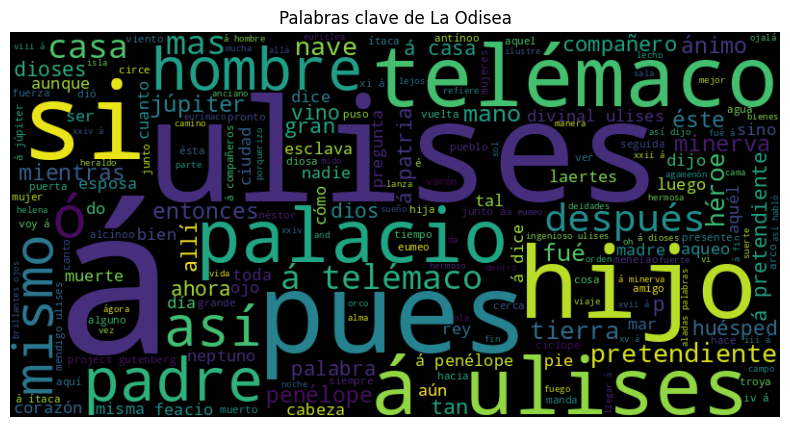

In [ ]:
# 4. Nube de palabras mejorada con la forma de un barco griego
wordcloud = WordCloud(width=800, height=400,
                      background_color='black',
                      stopwords=stop_words,
                      contour_width=3,
                      contour_color='steelblue').generate(texto_limpio)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras clave de La Odisea')
plt.show()

In [ ]:
def limpiar_texto(texto):
    # 1. Definir palabras adicionales a eliminar
    palabras_a_eliminar = {
        'dijo', 'así', 'aunque', 'sino', 'luego', 'pues', 'mientras',
        'después', 'antes', 'porque', 'cuando', 'cómo', 'donde', 'cap',
        'capítulo', 'verso', 'canto', 'á'  # Añade aquí las palabras que quieras eliminar
    }

    # 2. Combinar stopwords con palabras adicionales a eliminar
    todas_palabras_a_eliminar = stop_words.union(palabras_a_eliminar)

    # 3. Preparar el texto
    texto_minusculas = texto.lower()
    texto_sin_puntuacion = re.sub(r'[^\w\s]', '', texto_minusculas)
    lista_palabras = texto_sin_puntuacion.split()

    # 4. Crear lista para palabras importantes
    palabras_importantes = []

    # 5. Revisar cada palabra
    for palabra in lista_palabras:
        # Guardar solo si no está en la lista de palabras a eliminar
        if palabra not in todas_palabras_a_eliminar:
            palabras_importantes.append(palabra)

    return palabras_importantes

# Obtener y limpiar el texto
texto_completo = soup.get_text()
palabras_limpias = limpiar_texto(texto_completo)
texto_limpio = ' '.join(palabras_limpias)

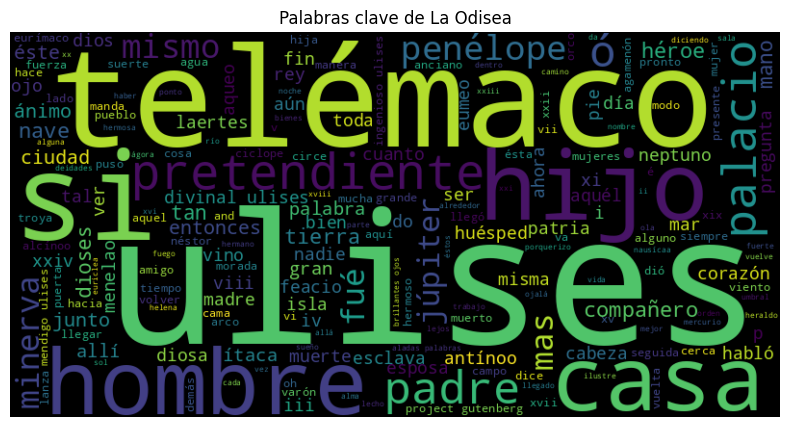

In [ ]:
# 4. Nube de palabras mejorada con la forma de un barco griego
wordcloud = WordCloud(width=800, height=400,
                      background_color='black',
                      stopwords=stop_words,
                      contour_width=3,
                      contour_color='steelblue').generate(texto_limpio)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras clave de La Odisea')
plt.show()